In [ ]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import tensorflow as tf
from keras.utils import to_categorical # type: ignore
import keras.utils as image # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL # type: ignore
import random


In [102]:
dicom_data = pd.read_csv('C:\F\ML Learning\Data_set_preparation\Data\csv\dicom_info.csv')
image_dir = 'C:\F\ML Learning\Data_set_preparation\Data\jpeg'

In [103]:
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [104]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [105]:
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head(10)

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
13    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
19    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
21    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.231894...
26    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.281604...
28    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.270732...
Name: image_path, dtype: object

In [106]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head(10)

0     C:\F\ML Learning\Data_set_preparation\Data\jpe...
3     C:\F\ML Learning\Data_set_preparation\Data\jpe...
6     C:\F\ML Learning\Data_set_preparation\Data\jpe...
7     C:\F\ML Learning\Data_set_preparation\Data\jpe...
10    C:\F\ML Learning\Data_set_preparation\Data\jpe...
13    C:\F\ML Learning\Data_set_preparation\Data\jpe...
19    C:\F\ML Learning\Data_set_preparation\Data\jpe...
21    C:\F\ML Learning\Data_set_preparation\Data\jpe...
26    C:\F\ML Learning\Data_set_preparation\Data\jpe...
28    C:\F\ML Learning\Data_set_preparation\Data\jpe...
Name: image_path, dtype: object

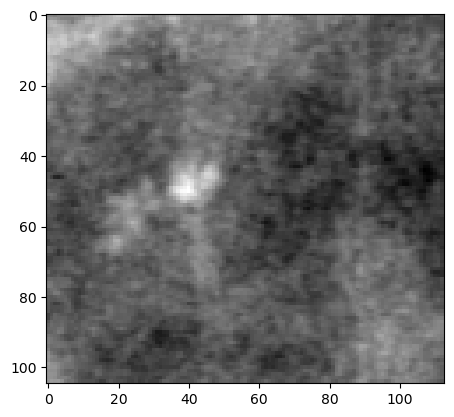

In [107]:
for file in cropped_images[:10]:
    cropped_images_show = PIL.Image.open(file)
    gray_img= cropped_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')


In [108]:
output_dir = r'C:\F\ML Learning\Data_set_preparation\Data\cropped_images'

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for file in cropped_images:
    cropped_images_show = PIL.Image.open(file)
    gray_img = cropped_images_show.convert("L")
    
    # Correctly join the path
    save_path = os.path.join(output_dir, os.path.basename(file))
    gray_img.save(save_path)


In [109]:
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

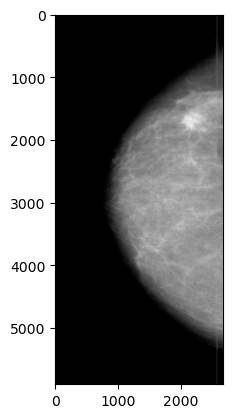

In [110]:
for file in full_mammogram_images[:10]:
    full_file_path = file.replace('CBIS-DDSM/jpeg', image_dir)
    full_mammogram_images_show = PIL.Image.open(full_file_path)
    gray_img = full_mammogram_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')


In [111]:
# Save the full mammogram images to the output directory

output_dir = r'C:\F\ML Learning\Data_set_preparation\Data\full_mammogram_images'

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for file in full_mammogram_images:
    full_file_path = file.replace('CBIS-DDSM/jpeg', image_dir)
    full_mammogram_images_show = PIL.Image.open(full_file_path)
    gray_img = full_mammogram_images_show.convert("L")
    
    # Correctly join the path
    save_path = os.path.join(output_dir, os.path.basename(file))
    gray_img.save(save_path)

In [ ]:
ROI_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

In [ ]:
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

In [ ]:
#Save ROI mask images to the output directory
output_dir = r'C:\F\ML Learning\Data_set_preparation\Data\roi_mask_images'

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for file in ROI_mask_images:
    roi_mask_images_show = PIL.Image.open(file)
    gray_img = roi_mask_images_show.convert("L")
    
    # Correctly join the path
    save_path = os.path.join(output_dir, os.path.basename(file))
    gray_img.save(save_path)
